In [39]:
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import glob
from sklearn.preprocessing import StandardScaler
from scipy.io import wavfile
from scipy.signal import stft
import numba as nb
from scipy.stats import entropy


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# MFCCs 

In [4]:
f = pd.read_csv('data-f.csv')


In [5]:
for i in f['id']:
    # load audio files with librosa
    signal, sr = librosa.load('audiodata/'+str(i))
    mfccs = np.mean(librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr).T,axis=0)
    delta_mfccs = np.mean(librosa.feature.delta(mfccs).T,axis=0)
    delta2_mfccs = np.mean(librosa.feature.delta(mfccs, order=2).T,axis=0)
    f.loc[f['id'] == i, 'MFCC-1'] =mfccs[0]
    f.loc[f['id'] == i, 'MFCC-2'] =mfccs[1]
    f.loc[f['id'] == i, 'MFCC-3'] =mfccs[2]
    f.loc[f['id'] == i, 'MFCC-4'] =mfccs[3]
    f.loc[f['id'] == i, 'MFCC-5'] =mfccs[4]
    f.loc[f['id'] == i, 'MFCC-6'] =mfccs[5]
    f.loc[f['id'] == i, 'MFCC-7'] =mfccs[6]
    f.loc[f['id'] == i, 'MFCC-8'] =mfccs[7] 
    f.loc[f['id'] == i, 'MFCC-9'] =mfccs[8]
    f.loc[f['id'] == i, 'MFCC-10'] =mfccs[9]
    f.loc[f['id'] == i, 'MFCC-11'] =mfccs[10]
    f.loc[f['id'] == i, 'MFCC-12'] =mfccs[11]
    f.loc[f['id'] == i, 'MFCC-13'] =mfccs[12]
    f.loc[f['id'] == i, '1st-derivative'] =delta_mfccs
    f.loc[f['id'] == i, '2nd-derivative'] =delta2_mfccs

In [6]:
f

,id,gender,age,status,MFCC-1,MFCC-2,MFCC-3,MFCC-4,MFCC-5,MFCC-6,MFCC-7,MFCC-8,MFCC-9,MFCC-10,MFCC-11,MFCC-12,MFCC-13,1st-derivative,2nd-derivative
0,1-a_n.wav,female,17-29,healthy,-229.900299,70.987656,-31.600691,-38.037273,-37.097298,-28.244047,23.086527,-3.702321,-29.035618,19.684288,-11.513266,-2.432917,-5.764521,6.110204,-4.813137
1,10-a_n.wav,female,17-29,healthy,-177.231812,124.980606,-4.989427,-26.419960,-10.432103,5.199066,-13.459819,29.368608,-18.531691,6.474063,-0.609437,13.707862,0.313944,2.660672,-2.824473
2,1059-a_n.wav,female,17-29,healthy,-215.689453,132.913712,-38.871655,-42.621090,-27.748386,-14.176871,-2.757598,23.727890,-22.948891,6.631990,9.736770,-17.351088,-0.563084,4.590938,-3.732108
3,1060-a_n.wav,female,17-29,healthy,-179.004013,137.124176,-41.186527,-12.956992,-23.057871,1.249742,12.310613,5.677735,-22.362137,22.160065,-19.430182,9.689588,-30.554930,1.903684,-3.933841
4,1065-a_n.wav,female,17-29,healthy,-219.231903,118.439713,-53.232697,-12.397227,-0.406237,1.629000,-0.372281,1.487446,-34.674034,20.461397,-3.294332,-12.353028,-6.538914,2.801241,-4.350231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,916-a_n.wav,male,60+,pathological,-206.275269,199.477036,-16.151987,-5.054139,-28.327045,-15.628398,-3.559500,26.115755,7.507662,-8.994985,8.004864,-2.805704,13.759897,3.060516,-2.444826
1360,918-a_n.wav,male,60+,pathological,-83.471779,134.779114,-53.661423,-13.109919,-63.956722,1.597356,-24.768343,9.757913,-19.314672,-2.862256,13.001028,0.785078,-13.930746,1.780056,-0.592388
1361,922-a_n.wav,male,60+,pathological,-281.555756,168.036407,28.660950,-7.232946,-38.963890,-7.814531,-7.640507,17.536627,-7.195324,9.665165,-6.795200,7.274139,24.941833,4.954917,-4.336839
1362,923-a_n.wav,male,60+,pathological,-218.406387,170.818329,-12.190666,-3.343062,-26.285761,-4.524966,17.202215,-0.297808,3.650085,-4.840356,-6.634346,19.276258,4.910005,3.197191,-3.278336


In [7]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['MFCC-1', 'MFCC-2', 'MFCC-3', 'MFCC-4', 'MFCC-5', 'MFCC-6', 'MFCC-7', 'MFCC-8', 'MFCC-9', 'MFCC-10', 'MFCC-11', 'MFCC-12', 'MFCC-13', '1st-derivative', '2nd-derivative']


scaler = MinMaxScaler(feature_range=(-1, 1))


scaled_cols = scaler.fit_transform(f[cols_to_scale])

df_scaled = pd.DataFrame(scaled_cols, columns=cols_to_scale)

f[cols_to_scale] = df_scaled[cols_to_scale]


In [8]:
f

,id,gender,age,status,MFCC-1,MFCC-2,MFCC-3,MFCC-4,MFCC-5,MFCC-6,MFCC-7,MFCC-8,MFCC-9,MFCC-10,MFCC-11,MFCC-12,MFCC-13,1st-derivative,2nd-derivative
0,1-a_n.wav,female,17-29,healthy,-0.129712,-0.823662,-0.218797,-0.560799,-0.135607,-0.297418,0.534995,-0.186073,-0.530086,0.478073,-0.182316,-0.113946,0.080308,0.845591,-0.127952
1,10-a_n.wav,female,17-29,healthy,0.199122,-0.206554,0.130936,-0.352918,0.412921,0.309148,-0.284263,0.525699,-0.261176,0.151716,0.124619,0.314070,0.228501,-0.001756,0.332969
2,1059-a_n.wav,female,17-29,healthy,-0.040987,-0.115883,-0.314355,-0.642822,0.056709,-0.042278,-0.044352,0.404296,-0.374261,0.155618,0.415858,-0.509541,0.207119,0.472397,0.122602
3,1060-a_n.wav,female,17-29,healthy,0.188057,-0.067760,-0.344777,-0.112011,0.153197,0.237518,0.293432,0.015810,-0.359239,0.539237,-0.405171,0.207515,-0.524082,-0.187704,0.075846
4,1065-a_n.wav,female,17-29,healthy,-0.063104,-0.281313,-0.503092,-0.101994,0.619163,0.244397,0.009120,-0.074376,-0.674435,0.497271,0.049041,-0.377004,0.061428,0.032773,-0.020662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,916-a_n.wav,male,60+,pathological,0.017790,0.644897,-0.015766,0.029404,0.044806,-0.068605,-0.062328,0.455689,0.405454,-0.230444,0.367106,-0.123831,0.556313,0.096462,0.420961
1360,918-a_n.wav,male,60+,pathological,0.784509,-0.094563,-0.508726,-0.114747,-0.688131,0.243823,-0.537766,0.103626,-0.281222,-0.078936,0.507744,-0.028612,-0.118785,-0.218072,0.850308
1361,922-a_n.wav,male,60+,pathological,-0.452221,0.285549,0.573179,-0.009584,-0.174004,0.073117,-0.153812,0.271044,0.029045,0.230552,-0.049506,0.143463,0.828928,0.561805,-0.017558
1362,923-a_n.wav,male,60+,pathological,-0.057950,0.317345,0.036295,0.060022,0.086797,0.132781,0.403087,-0.112799,0.306697,-0.127805,-0.044978,0.461731,0.340552,0.130035,0.227775


In [9]:
f.isnull().values.any()

False

# Save DataFrame

In [5]:
f.to_csv('mfccsdone.csv')

NameError: name 'f' is not defined

# Categoric data to numeric

In [4]:
data=pd.read_csv('mfccsdone.csv',index_col = [0])
data

,id,gender,age,status,MFCC-1,MFCC-2,MFCC-3,MFCC-4,MFCC-5,MFCC-6,MFCC-7,MFCC-8,MFCC-9,MFCC-10,MFCC-11,MFCC-12,MFCC-13,1st-derivative,2nd-derivative
0,1-a_n.wav,female,17-29,healthy,-0.129712,-0.823662,-0.218797,-0.560799,-0.135607,-0.297418,0.534995,-0.186073,-0.530086,0.478073,-0.182316,-0.113946,0.080308,0.845591,-0.127952
1,10-a_n.wav,female,17-29,healthy,0.199122,-0.206554,0.130936,-0.352918,0.412921,0.309148,-0.284263,0.525699,-0.261176,0.151716,0.124619,0.314070,0.228501,-0.001756,0.332969
2,1059-a_n.wav,female,17-29,healthy,-0.040987,-0.115883,-0.314355,-0.642822,0.056709,-0.042278,-0.044352,0.404296,-0.374261,0.155618,0.415858,-0.509541,0.207119,0.472397,0.122602
3,1060-a_n.wav,female,17-29,healthy,0.188057,-0.067760,-0.344777,-0.112011,0.153197,0.237518,0.293432,0.015810,-0.359239,0.539237,-0.405171,0.207515,-0.524082,-0.187704,0.075846
4,1065-a_n.wav,female,17-29,healthy,-0.063104,-0.281313,-0.503092,-0.101994,0.619163,0.244397,0.009120,-0.074376,-0.674435,0.497271,0.049041,-0.377004,0.061428,0.032773,-0.020662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,916-a_n.wav,male,60+,pathological,0.017790,0.644897,-0.015766,0.029404,0.044806,-0.068605,-0.062328,0.455689,0.405454,-0.230444,0.367106,-0.123831,0.556313,0.096462,0.420961
1360,918-a_n.wav,male,60+,pathological,0.784509,-0.094563,-0.508726,-0.114747,-0.688131,0.243823,-0.537766,0.103626,-0.281222,-0.078936,0.507744,-0.028612,-0.118785,-0.218072,0.850308
1361,922-a_n.wav,male,60+,pathological,-0.452221,0.285549,0.573179,-0.009584,-0.174004,0.073117,-0.153812,0.271044,0.029045,0.230552,-0.049506,0.143463,0.828928,0.561805,-0.017558
1362,923-a_n.wav,male,60+,pathological,-0.057950,0.317345,0.036295,0.060022,0.086797,0.132781,0.403087,-0.112799,0.306697,-0.127805,-0.044978,0.461731,0.340552,0.130035,0.227775


# Gender to numeric

In [5]:
from sklearn.preprocessing import LabelEncoder
 

le = LabelEncoder()
 
label = le.fit_transform(data['gender'])
d=data.drop("gender", axis=1)
d["gender"] = label
d

,id,age,status,MFCC-1,MFCC-2,MFCC-3,MFCC-4,MFCC-5,MFCC-6,MFCC-7,MFCC-8,MFCC-9,MFCC-10,MFCC-11,MFCC-12,MFCC-13,1st-derivative,2nd-derivative,gender
0,1-a_n.wav,17-29,healthy,-0.129712,-0.823662,-0.218797,-0.560799,-0.135607,-0.297418,0.534995,-0.186073,-0.530086,0.478073,-0.182316,-0.113946,0.080308,0.845591,-0.127952,0
1,10-a_n.wav,17-29,healthy,0.199122,-0.206554,0.130936,-0.352918,0.412921,0.309148,-0.284263,0.525699,-0.261176,0.151716,0.124619,0.314070,0.228501,-0.001756,0.332969,0
2,1059-a_n.wav,17-29,healthy,-0.040987,-0.115883,-0.314355,-0.642822,0.056709,-0.042278,-0.044352,0.404296,-0.374261,0.155618,0.415858,-0.509541,0.207119,0.472397,0.122602,0
3,1060-a_n.wav,17-29,healthy,0.188057,-0.067760,-0.344777,-0.112011,0.153197,0.237518,0.293432,0.015810,-0.359239,0.539237,-0.405171,0.207515,-0.524082,-0.187704,0.075846,0
4,1065-a_n.wav,17-29,healthy,-0.063104,-0.281313,-0.503092,-0.101994,0.619163,0.244397,0.009120,-0.074376,-0.674435,0.497271,0.049041,-0.377004,0.061428,0.032773,-0.020662,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,916-a_n.wav,60+,pathological,0.017790,0.644897,-0.015766,0.029404,0.044806,-0.068605,-0.062328,0.455689,0.405454,-0.230444,0.367106,-0.123831,0.556313,0.096462,0.420961,1
1360,918-a_n.wav,60+,pathological,0.784509,-0.094563,-0.508726,-0.114747,-0.688131,0.243823,-0.537766,0.103626,-0.281222,-0.078936,0.507744,-0.028612,-0.118785,-0.218072,0.850308,1
1361,922-a_n.wav,60+,pathological,-0.452221,0.285549,0.573179,-0.009584,-0.174004,0.073117,-0.153812,0.271044,0.029045,0.230552,-0.049506,0.143463,0.828928,0.561805,-0.017558,1
1362,923-a_n.wav,60+,pathological,-0.057950,0.317345,0.036295,0.060022,0.086797,0.132781,0.403087,-0.112799,0.306697,-0.127805,-0.044978,0.461731,0.340552,0.130035,0.227775,1


# Status category to numeric 

In [6]:
le = LabelEncoder()
label = le.fit_transform(data['status'])
d=d.drop("status", axis=1)
d["status"] = label
d

,id,age,MFCC-1,MFCC-2,MFCC-3,MFCC-4,MFCC-5,MFCC-6,MFCC-7,MFCC-8,MFCC-9,MFCC-10,MFCC-11,MFCC-12,MFCC-13,1st-derivative,2nd-derivative,gender,status
0,1-a_n.wav,17-29,-0.129712,-0.823662,-0.218797,-0.560799,-0.135607,-0.297418,0.534995,-0.186073,-0.530086,0.478073,-0.182316,-0.113946,0.080308,0.845591,-0.127952,0,0
1,10-a_n.wav,17-29,0.199122,-0.206554,0.130936,-0.352918,0.412921,0.309148,-0.284263,0.525699,-0.261176,0.151716,0.124619,0.314070,0.228501,-0.001756,0.332969,0,0
2,1059-a_n.wav,17-29,-0.040987,-0.115883,-0.314355,-0.642822,0.056709,-0.042278,-0.044352,0.404296,-0.374261,0.155618,0.415858,-0.509541,0.207119,0.472397,0.122602,0,0
3,1060-a_n.wav,17-29,0.188057,-0.067760,-0.344777,-0.112011,0.153197,0.237518,0.293432,0.015810,-0.359239,0.539237,-0.405171,0.207515,-0.524082,-0.187704,0.075846,0,0
4,1065-a_n.wav,17-29,-0.063104,-0.281313,-0.503092,-0.101994,0.619163,0.244397,0.009120,-0.074376,-0.674435,0.497271,0.049041,-0.377004,0.061428,0.032773,-0.020662,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,916-a_n.wav,60+,0.017790,0.644897,-0.015766,0.029404,0.044806,-0.068605,-0.062328,0.455689,0.405454,-0.230444,0.367106,-0.123831,0.556313,0.096462,0.420961,1,1
1360,918-a_n.wav,60+,0.784509,-0.094563,-0.508726,-0.114747,-0.688131,0.243823,-0.537766,0.103626,-0.281222,-0.078936,0.507744,-0.028612,-0.118785,-0.218072,0.850308,1,1
1361,922-a_n.wav,60+,-0.452221,0.285549,0.573179,-0.009584,-0.174004,0.073117,-0.153812,0.271044,0.029045,0.230552,-0.049506,0.143463,0.828928,0.561805,-0.017558,1,1
1362,923-a_n.wav,60+,-0.057950,0.317345,0.036295,0.060022,0.086797,0.132781,0.403087,-0.112799,0.306697,-0.127805,-0.044978,0.461731,0.340552,0.130035,0.227775,1,1


# Age category to numeric 

In [7]:
le = LabelEncoder()
label = le.fit_transform(data['age'])
d=d.drop("age", axis=1)
d["age"] = label
d

,id,MFCC-1,MFCC-2,MFCC-3,MFCC-4,MFCC-5,MFCC-6,MFCC-7,MFCC-8,MFCC-9,MFCC-10,MFCC-11,MFCC-12,MFCC-13,1st-derivative,2nd-derivative,gender,status,age
0,1-a_n.wav,-0.129712,-0.823662,-0.218797,-0.560799,-0.135607,-0.297418,0.534995,-0.186073,-0.530086,0.478073,-0.182316,-0.113946,0.080308,0.845591,-0.127952,0,0,0
1,10-a_n.wav,0.199122,-0.206554,0.130936,-0.352918,0.412921,0.309148,-0.284263,0.525699,-0.261176,0.151716,0.124619,0.314070,0.228501,-0.001756,0.332969,0,0,0
2,1059-a_n.wav,-0.040987,-0.115883,-0.314355,-0.642822,0.056709,-0.042278,-0.044352,0.404296,-0.374261,0.155618,0.415858,-0.509541,0.207119,0.472397,0.122602,0,0,0
3,1060-a_n.wav,0.188057,-0.067760,-0.344777,-0.112011,0.153197,0.237518,0.293432,0.015810,-0.359239,0.539237,-0.405171,0.207515,-0.524082,-0.187704,0.075846,0,0,0
4,1065-a_n.wav,-0.063104,-0.281313,-0.503092,-0.101994,0.619163,0.244397,0.009120,-0.074376,-0.674435,0.497271,0.049041,-0.377004,0.061428,0.032773,-0.020662,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,916-a_n.wav,0.017790,0.644897,-0.015766,0.029404,0.044806,-0.068605,-0.062328,0.455689,0.405454,-0.230444,0.367106,-0.123831,0.556313,0.096462,0.420961,1,1,4
1360,918-a_n.wav,0.784509,-0.094563,-0.508726,-0.114747,-0.688131,0.243823,-0.537766,0.103626,-0.281222,-0.078936,0.507744,-0.028612,-0.118785,-0.218072,0.850308,1,1,4
1361,922-a_n.wav,-0.452221,0.285549,0.573179,-0.009584,-0.174004,0.073117,-0.153812,0.271044,0.029045,0.230552,-0.049506,0.143463,0.828928,0.561805,-0.017558,1,1,4
1362,923-a_n.wav,-0.057950,0.317345,0.036295,0.060022,0.086797,0.132781,0.403087,-0.112799,0.306697,-0.127805,-0.044978,0.461731,0.340552,0.130035,0.227775,1,1,4


# Dimension reduction

In [8]:
df2=d[['MFCC-1','MFCC-2','MFCC-3','MFCC-4','MFCC-5','MFCC-6','MFCC-7','MFCC-8','MFCC-9','MFCC-10','MFCC-11', 'MFCC-12', 'MFCC-13','1st-derivative','2nd-derivative','gender','status','age']]


In [9]:
df2.to_csv('fullvector.csv')

# Info Gain Evaluation

In [25]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif


X = df2.drop('status', axis=1)
y = df2['status']

# Calculate the mutual information between each feature and the target variable
mutual_info = mutual_info_classif(X, y)

# Print the mutual information scores for each feature
for i, feature in enumerate(X.columns):
    print(f'{feature}: {mutual_info[i]}')

MFCC-1: 0.04980803488492924
MFCC-2: 0.0
MFCC-3: 0.027606891133158395
MFCC-4: 0.0
MFCC-5: 0.0
MFCC-6: 0.009896196142705538
MFCC-7: 0.0
MFCC-8: 0.0060361613745554266
MFCC-9: 0.0
MFCC-10: 0.010065599482929732
MFCC-11: 0.019099218345135283
MFCC-12: 0.015943890282414053
MFCC-13: 0.0
1st-derivative: 0.04525101807142984
2nd-derivative: 0.0
gender: 0.0
age: 0.26141035129901313


In [26]:
infogain_features=df2[['age','MFCC-1','MFCC-3','MFCC-6','MFCC-11','MFCC-12','MFCC-10','1st-derivative','status']]

In [27]:
infogain_features

,age,MFCC-1,MFCC-3,MFCC-6,MFCC-11,MFCC-12,MFCC-10,1st-derivative,status
0,0,-0.129712,-0.218797,-0.297418,-0.182316,-0.113946,0.478073,0.845591,0
1,0,0.199122,0.130936,0.309148,0.124619,0.314070,0.151716,-0.001756,0
2,0,-0.040987,-0.314355,-0.042278,0.415858,-0.509541,0.155618,0.472397,0
3,0,0.188057,-0.344777,0.237518,-0.405171,0.207515,0.539237,-0.187704,0
4,0,-0.063104,-0.503092,0.244397,0.049041,-0.377004,0.497271,0.032773,0
...,...,...,...,...,...,...,...,...,...
1359,4,0.017790,-0.015766,-0.068605,0.367106,-0.123831,-0.230444,0.096462,1
1360,4,0.784509,-0.508726,0.243823,0.507744,-0.028612,-0.078936,-0.218072,1
1361,4,-0.452221,0.573179,0.073117,-0.049506,0.143463,0.230552,0.561805,1
1362,4,-0.057950,0.036295,0.132781,-0.044978,0.461731,-0.127805,0.130035,1


In [28]:
infogain_features.to_csv('infogain_features.csv', index=False)

# Correlation method

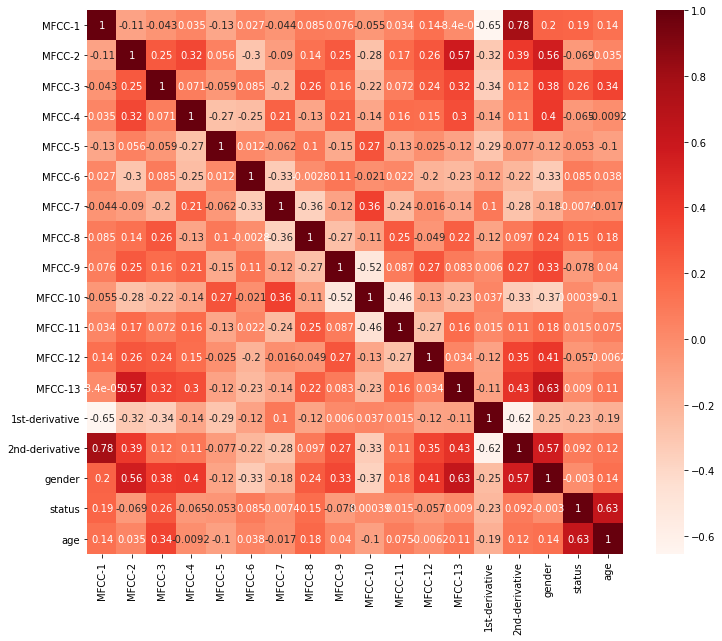

In [16]:

import seaborn as sns
import statsmodels.api as sm
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [17]:
#Correlation with output variable
cor_target = abs(cor["status"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.39]
relevant_features

status    1.00000
age       0.62689
Name: status, dtype: float64

In [18]:
#Correlation with output variable
cor_target = abs(cor["status"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.09]
relevant_features

MFCC-1            0.193198
MFCC-3            0.257940
MFCC-8            0.154112
1st-derivative    0.227570
2nd-derivative    0.091971
status            1.000000
age               0.626890
Name: status, dtype: float64

In [19]:
correlationmethod_features=df2[['age','status','1st-derivative','MFCC-3','MFCC-1','MFCC-8','2nd-derivative']]

In [22]:
correlationmethod_features

,age,status,1st-derivative,MFCC-3,MFCC-1,MFCC-8,2nd-derivative
0,0,0,0.845591,-0.218797,-0.129712,-0.186073,-0.127952
1,0,0,-0.001756,0.130936,0.199122,0.525699,0.332969
2,0,0,0.472397,-0.314355,-0.040987,0.404296,0.122602
3,0,0,-0.187704,-0.344777,0.188057,0.015810,0.075846
4,0,0,0.032773,-0.503092,-0.063104,-0.074376,-0.020662
...,...,...,...,...,...,...,...
1359,4,1,0.096462,-0.015766,0.017790,0.455689,0.420961
1360,4,1,-0.218072,-0.508726,0.784509,0.103626,0.850308
1361,4,1,0.561805,0.573179,-0.452221,0.271044,-0.017558
1362,4,1,0.130035,0.036295,-0.057950,-0.112799,0.227775


In [23]:
correlationmethod_features.to_csv('correlationmethod_features.csv', index=False)

# Classifiers

In [3]:
df2=pd.read_csv('fullvector.csv')

In [4]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df2

,MFCC-1,MFCC-2,MFCC-3,MFCC-4,MFCC-5,MFCC-6,MFCC-7,MFCC-8,MFCC-9,MFCC-10,MFCC-11,MFCC-12,MFCC-13,1st-derivative,2nd-derivative,gender,status,age
0,-0.129712,-0.823662,-0.218797,-0.560799,-0.135607,-0.297418,0.534995,-0.186073,-0.530086,0.478073,-0.182316,-0.113946,0.080308,0.845591,-0.127952,0,0,0
1,0.199122,-0.206554,0.130936,-0.352918,0.412921,0.309148,-0.284263,0.525699,-0.261176,0.151716,0.124619,0.314070,0.228501,-0.001756,0.332969,0,0,0
2,-0.040987,-0.115883,-0.314355,-0.642822,0.056709,-0.042278,-0.044352,0.404296,-0.374261,0.155618,0.415858,-0.509541,0.207119,0.472397,0.122602,0,0,0
3,0.188057,-0.067760,-0.344777,-0.112011,0.153197,0.237518,0.293432,0.015810,-0.359239,0.539237,-0.405171,0.207515,-0.524082,-0.187704,0.075846,0,0,0
4,-0.063104,-0.281313,-0.503092,-0.101994,0.619163,0.244397,0.009120,-0.074376,-0.674435,0.497271,0.049041,-0.377004,0.061428,0.032773,-0.020662,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,0.017790,0.644897,-0.015766,0.029404,0.044806,-0.068605,-0.062328,0.455689,0.405454,-0.230444,0.367106,-0.123831,0.556313,0.096462,0.420961,1,1,4
1360,0.784509,-0.094563,-0.508726,-0.114747,-0.688131,0.243823,-0.537766,0.103626,-0.281222,-0.078936,0.507744,-0.028612,-0.118785,-0.218072,0.850308,1,1,4
1361,-0.452221,0.285549,0.573179,-0.009584,-0.174004,0.073117,-0.153812,0.271044,0.029045,0.230552,-0.049506,0.143463,0.828928,0.561805,-0.017558,1,1,4
1362,-0.057950,0.317345,0.036295,0.060022,0.086797,0.132781,0.403087,-0.112799,0.306697,-0.127805,-0.044978,0.461731,0.340552,0.130035,0.227775,1,1,4


# SVM

In [9]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

X = df2.drop('status', axis=1)
y = df2['status']
 
# training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='rbf')
 
# Fit the model
svc.fit(X_train_std, y_train)


# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.783


# Naive Bayes Classifier

In [11]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="micro")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7463414634146341
F1 Score: 0.7463414634146343


# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


X = df2.drop('status', axis=1)
y = df2['status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier(n_estimators=150,max_depth=7,random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier
RandomForestClassifier()
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8315018315018315


# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier


X = df2.drop('status', axis=1)
y = df2['status']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=19 ,metric='euclidean', weights='distance')  # You can choose the value of k (number of neighbors) based on your preference or using cross-validation.

knn_classifier.fit(X_train, y_train)


KNeighborsClassifier
KNeighborsClassifier()
y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7985347985347986
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       144
           1       0.81      0.74      0.78       129

    accuracy                           0.80       273
   macro avg       0.80      0.80      0.80       273
weighted avg       0.80      0.80      0.80       273

Confusion Matrix:
 [[122  22]
 [ 33  96]]


# Gradient Boosting Classifier

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



X = df2.drop('status', axis=1)
y = df2['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators= 65)

# Fit the classifier to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7838827838827839
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       144
           1       0.77      0.78      0.77       129

    accuracy                           0.78       273
   macro avg       0.78      0.78      0.78       273
weighted avg       0.78      0.78      0.78       273

Confusion Matrix:
 [[113  31]
 [ 28 101]]
